In [5]:
# Data Clean Up
bodyfat_raw <- read.csv("BodyFat.csv")

In [6]:
head(bodyfat_raw)

IDNO,BODYFAT,DENSITY,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,12.6,1.0708,23,154.25,67.75,23.7,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
2,6.9,1.0853,22,173.25,72.25,23.4,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
3,24.6,1.0414,22,154.00,66.25,24.7,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
4,10.9,1.0751,26,184.75,72.25,24.9,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
5,27.8,1.0340,24,184.25,71.25,25.6,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
6,20.6,1.0502,24,210.25,74.75,26.5,39.0,104.5,94.4,107.8,66.0,42.0,25.6,35.7,30.6,18.8


In [7]:
bodyfat <- bodyfat_raw[,-c(1,3)]

In [8]:
head(bodyfat)

BODYFAT,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
12.6,23,154.25,67.75,23.7,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
6.9,22,173.25,72.25,23.4,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
24.6,22,154.00,66.25,24.7,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
10.9,26,184.75,72.25,24.9,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
27.8,24,184.25,71.25,25.6,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
20.6,24,210.25,74.75,26.5,39.0,104.5,94.4,107.8,66.0,42.0,25.6,35.7,30.6,18.8


In [9]:
summary(bodyfat)

    BODYFAT           AGE            WEIGHT          HEIGHT     
 Min.   : 0.00   Min.   :22.00   Min.   :118.5   Min.   :29.50  
 1st Qu.:12.80   1st Qu.:35.75   1st Qu.:159.0   1st Qu.:68.25  
 Median :19.00   Median :43.00   Median :176.5   Median :70.00  
 Mean   :18.94   Mean   :44.88   Mean   :178.9   Mean   :70.15  
 3rd Qu.:24.60   3rd Qu.:54.00   3rd Qu.:197.0   3rd Qu.:72.25  
 Max.   :45.10   Max.   :81.00   Max.   :363.1   Max.   :77.75  
   ADIPOSITY          NECK           CHEST           ABDOMEN      
 Min.   :18.10   Min.   :31.10   Min.   : 79.30   Min.   : 69.40  
 1st Qu.:23.10   1st Qu.:36.40   1st Qu.: 94.35   1st Qu.: 84.58  
 Median :25.05   Median :38.00   Median : 99.65   Median : 90.95  
 Mean   :25.44   Mean   :37.99   Mean   :100.82   Mean   : 92.56  
 3rd Qu.:27.32   3rd Qu.:39.42   3rd Qu.:105.38   3rd Qu.: 99.33  
 Max.   :48.90   Max.   :51.20   Max.   :136.20   Max.   :148.10  
      HIP            THIGH            KNEE           ANKLE          BICEPS  

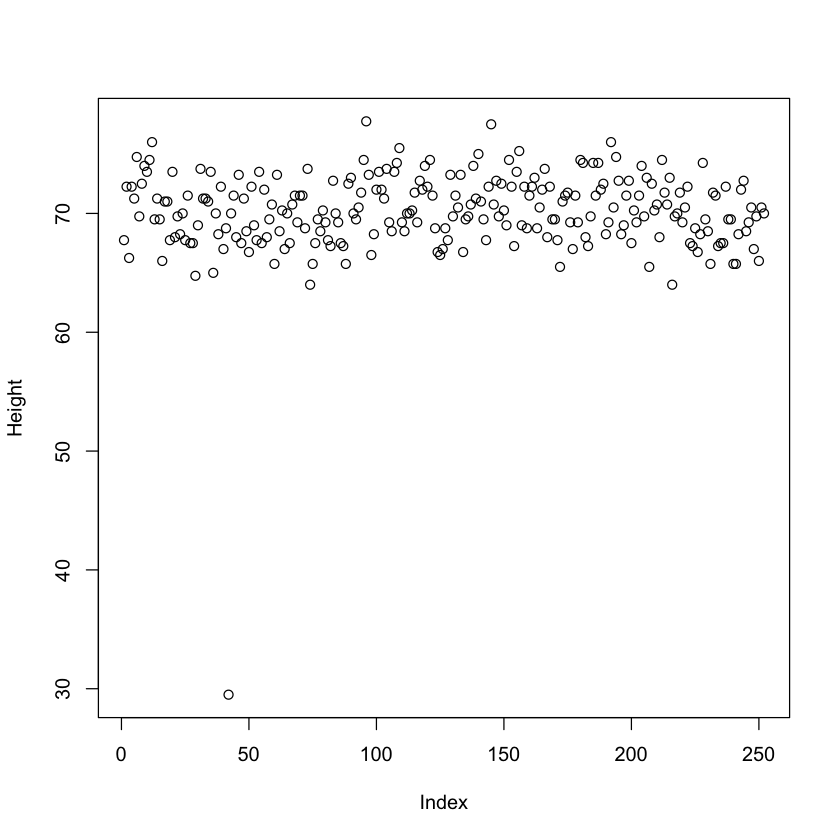

In [5]:
plot(bodyfat[,'HEIGHT'],ylab = 'Height')

In [18]:
d1 = which.min(bodyfat[,'HEIGHT'])

In [19]:
bodyfat[d1,'HEIGHT']

[1] 29.5

In [20]:
#bodyfat <- bodyfat[-42,]

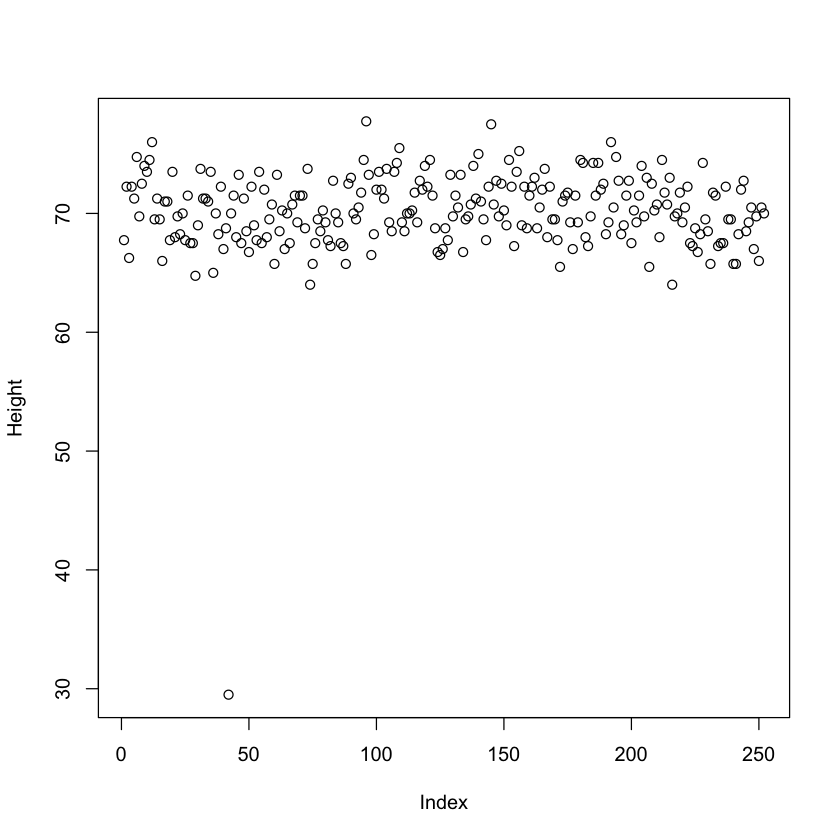

In [21]:
plot(bodyfat[,'HEIGHT'],ylab = 'Height')

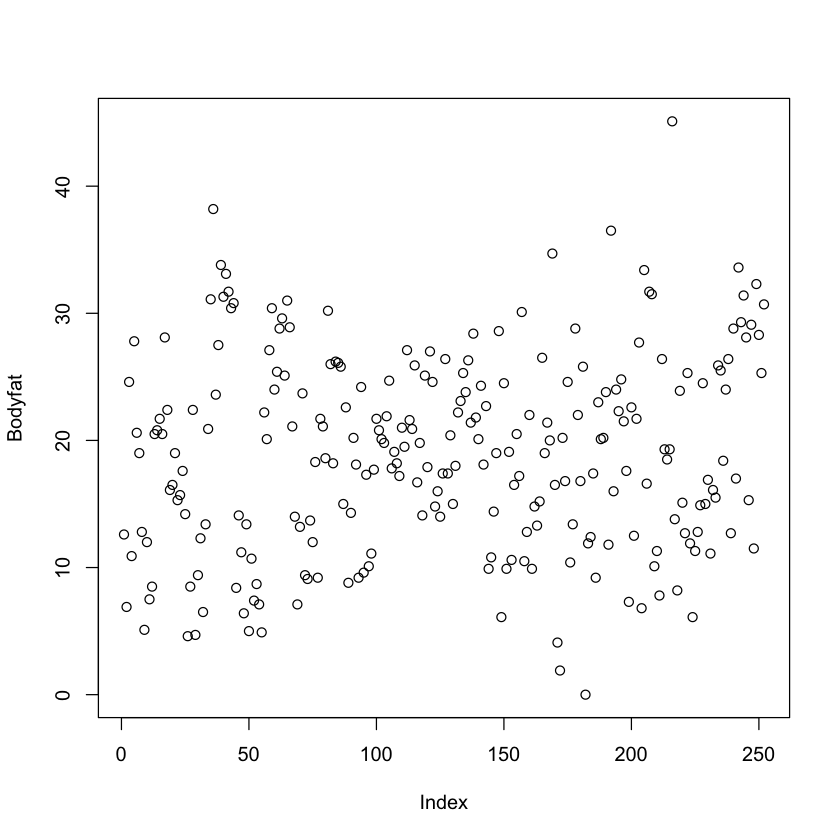

In [22]:
plot(bodyfat[,'BODYFAT'],ylab = 'Bodyfat')

In [23]:
d2 = which(bodyfat$BODYFAT==sort(bodyfat$BODYFAT,partial=1)[1])

In [24]:
bodyfat[d2,'BODYFAT']

[1] 0

In [25]:
d3 = which(bodyfat$BODYFAT==sort(bodyfat$BODYFAT,partial=nrow(bodyfat))[nrow(bodyfat)])

In [26]:
bodyfat[d3,'BODYFAT']

[1] 45.1

In [27]:
d4 = which(bodyfat$BODYFAT==sort(bodyfat$BODYFAT,partial=2)[2])

In [28]:
bodyfat[d4,'BODYFAT']

[1] 1.9

In [13]:
bodyfat[which.max(bodyfat[,'ADIPOSITY']),'ADIPOSITY']

[1] 48.9

In [14]:
eyeballing_cleanup = c(d1,d2,d3,d4,d5)
bodyfat_1 = bodyfat[-eyeballing_cleanup,]

ERROR: Error in eval(expr, envir, enclos): object 'd1' not found


In [15]:
summary(model_1 <- lm(BODYFAT ~ ., data=bodyfat_1))

ERROR: Error in is.data.frame(data): object 'bodyfat_1' not found


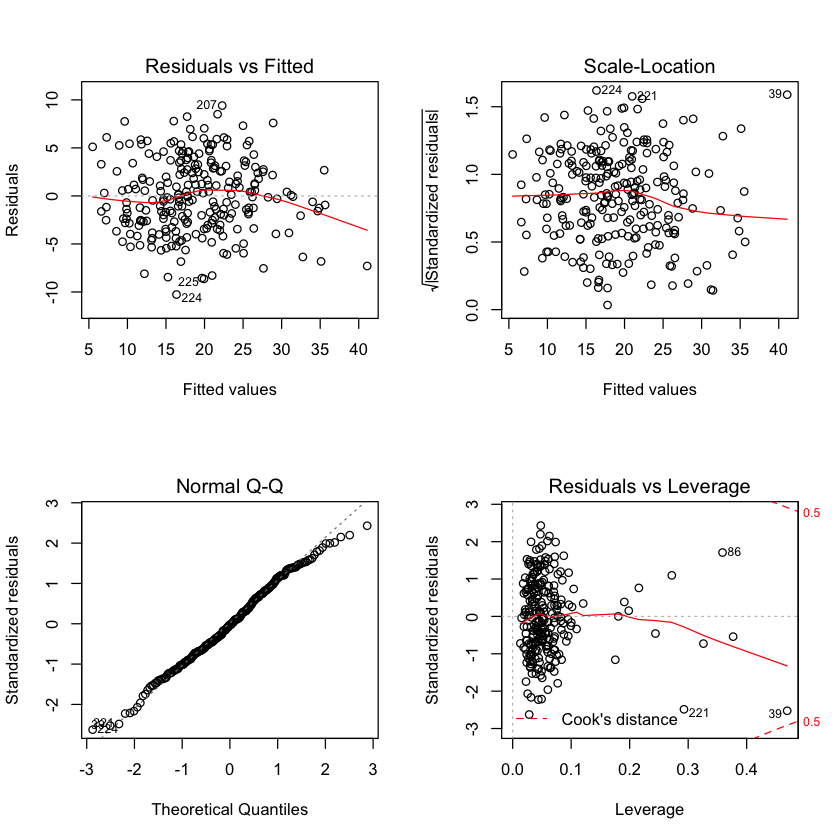

In [19]:
layout(matrix(1:4, ncol=2))
plot(model_1)

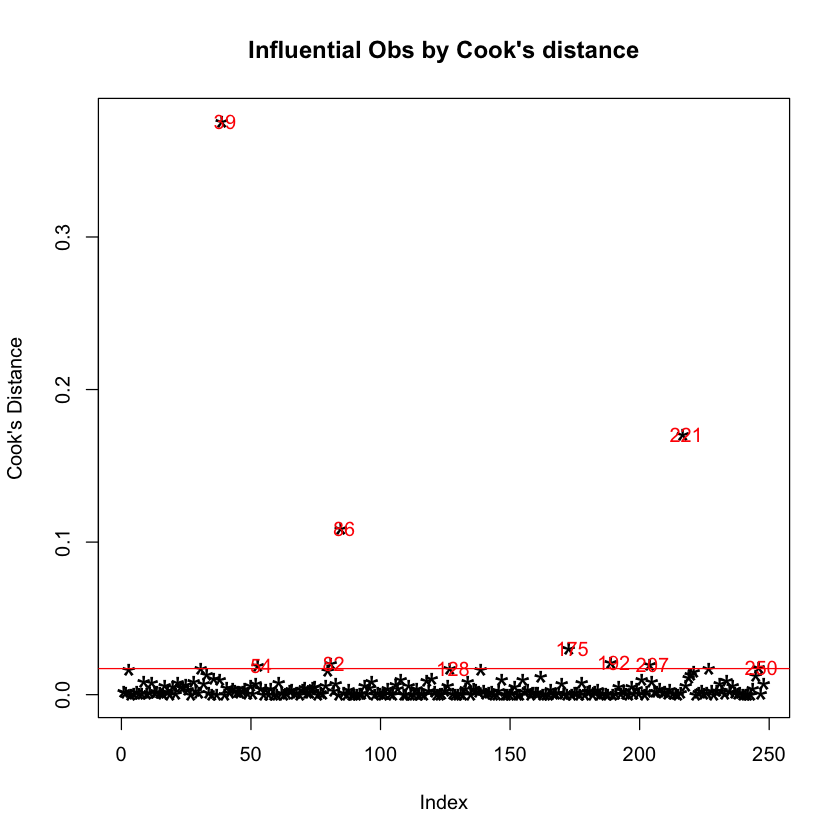

In [20]:
# Plot the Cook's Distance using the traditional 4/(n-p) criterion
cooksd <- cooks.distance(model_1)
sample_size <- nrow(bodyfat_1)
para_size <- ncol(bodyfat_1)-1
plot(cooksd, pch="*", cex=2, main="Influential Obs by Cook\'s distance", ylab = 'Cook\'s Distance')  # plot cook's distance
abline(h = 4/(sample_size-para_size), col="red")  # add cutoff line
text(x=1:length(cooksd)+1, y=cooksd, labels=ifelse(cooksd>4/(sample_size-para_size), names(cooksd),""), col="red")  # add labels

In [21]:
#influential <- as.numeric(names(cooksd)[(cooksd > (4/(sample_size-para_size)))])
influential <- c(39,85,217)
bodyfat_2 <- bodyfat_1[-influential,]
summary(model_2 <- lm(BODYFAT ~ ., data=bodyfat_2))


Call:
lm(formula = BODYFAT ~ ., data = bodyfat_2)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.6145 -2.7682 -0.1341  2.6990  8.9761 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -52.98425   45.50500  -1.164  0.24548    
AGE           0.05300    0.03014   1.759  0.07997 .  
WEIGHT       -0.17623    0.12738  -1.383  0.16787    
HEIGHT        0.54474    0.61859   0.881  0.37945    
ADIPOSITY     1.01247    0.87017   1.164  0.24582    
NECK         -0.31973    0.21555  -1.483  0.13935    
CHEST        -0.09945    0.10371  -0.959  0.33859    
ABDOMEN       0.83770    0.08560   9.786  < 2e-16 ***
HIP          -0.17800    0.13577  -1.311  0.19117    
THIGH         0.20692    0.13789   1.501  0.13483    
KNEE          0.03515    0.22914   0.153  0.87821    
ANKLE        -0.04642    0.24864  -0.187  0.85205    
BICEPS        0.11607    0.15746   0.737  0.46180    
FOREARM       0.28857    0.19136   1.508  0.13292    
WRIST        -1.37550    0.498

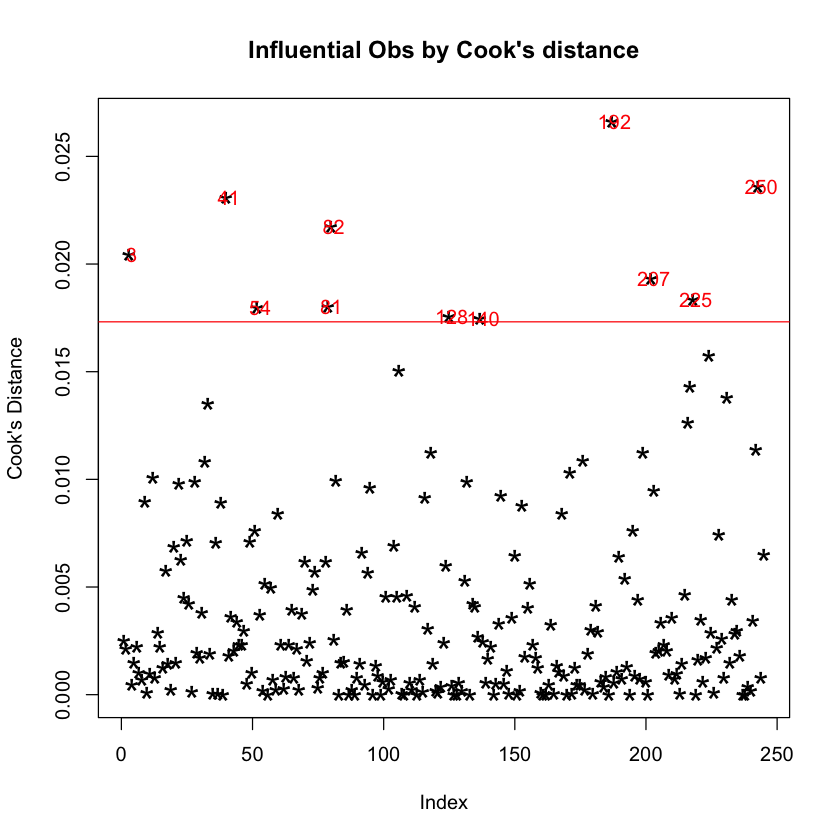

In [22]:
cooksd <- cooks.distance(model_2)
sample_size <- nrow(bodyfat_2)
para_size <- ncol(bodyfat_2)-1
plot(cooksd, pch="*", cex=2, main="Influential Obs by Cook\'s distance", ylab = 'Cook\'s Distance')  # plot cook's distance
abline(h = 4/(sample_size-para_size), col="red")  # add cutoff line
text(x=1:length(cooksd)+1, y=cooksd, labels=ifelse(cooksd>4/(sample_size-para_size), names(cooksd),""), col="red")  # add labels

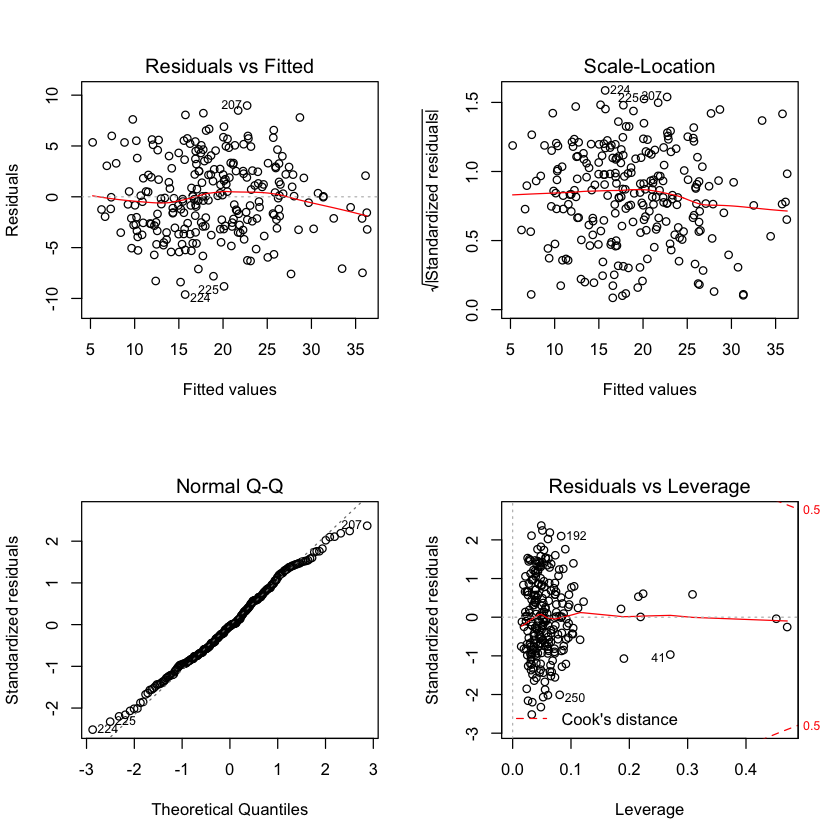

In [23]:
layout(matrix(1:4, ncol=2))
plot(model_2)

In [24]:
library(car)
outlierTest(model_2)

Loading required package: carData


No Studentized residuals with Bonferonni p < 0.05
Largest |rstudent|:
     rstudent unadjusted p-value Bonferonni p
224 -2.547307           0.011511           NA

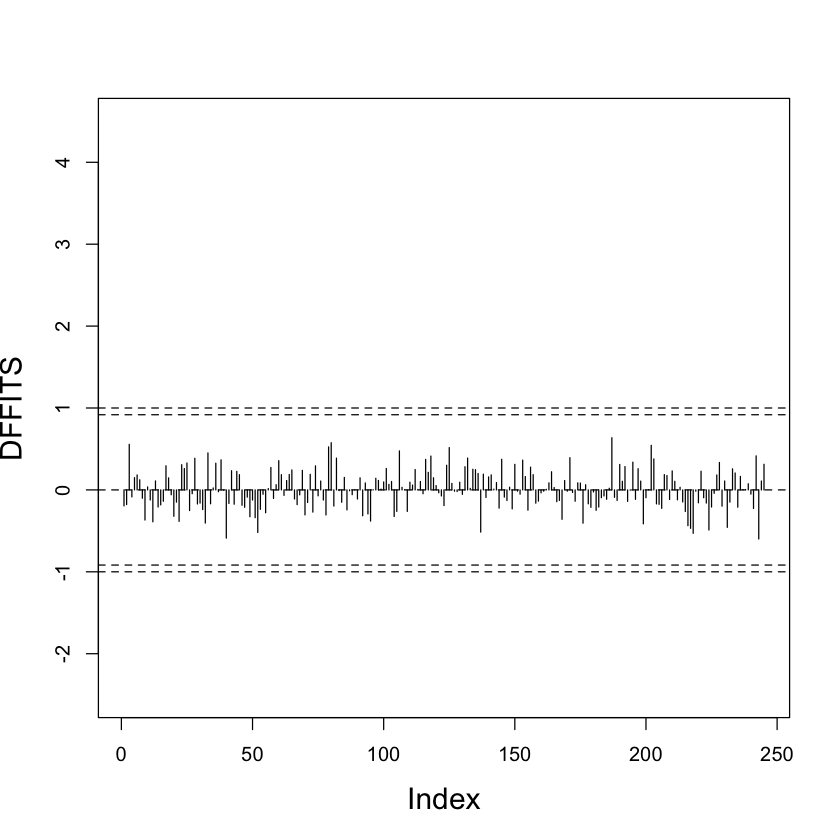

In [25]:
lm.reg.dffits = dffits(model_2)
plot(lm.reg.dffits, type = "h", ylab = "DFFITS", ylim = c(-2.5,4.5),cex.lab=1.5) 
abline(h = c(-1,-2*sqrt(4/19), 0, 2*sqrt(4/19), 1), lty = 2)

In [26]:
# Variable Selecation

In [27]:
# Eyeballing Varibales

In [28]:
summary(model_2)


Call:
lm(formula = BODYFAT ~ ., data = bodyfat_2)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.6145 -2.7682 -0.1341  2.6990  8.9761 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -52.98425   45.50500  -1.164  0.24548    
AGE           0.05300    0.03014   1.759  0.07997 .  
WEIGHT       -0.17623    0.12738  -1.383  0.16787    
HEIGHT        0.54474    0.61859   0.881  0.37945    
ADIPOSITY     1.01247    0.87017   1.164  0.24582    
NECK         -0.31973    0.21555  -1.483  0.13935    
CHEST        -0.09945    0.10371  -0.959  0.33859    
ABDOMEN       0.83770    0.08560   9.786  < 2e-16 ***
HIP          -0.17800    0.13577  -1.311  0.19117    
THIGH         0.20692    0.13789   1.501  0.13483    
KNEE          0.03515    0.22914   0.153  0.87821    
ANKLE        -0.04642    0.24864  -0.187  0.85205    
BICEPS        0.11607    0.15746   0.737  0.46180    
FOREARM       0.28857    0.19136   1.508  0.13292    
WRIST        -1.37550    0.498

In [29]:
# Weight, Height, Adiposity and Knee all has a large p-value.


Attaching package: ‘faraway’

The following objects are masked from ‘package:car’:

    logit, vif



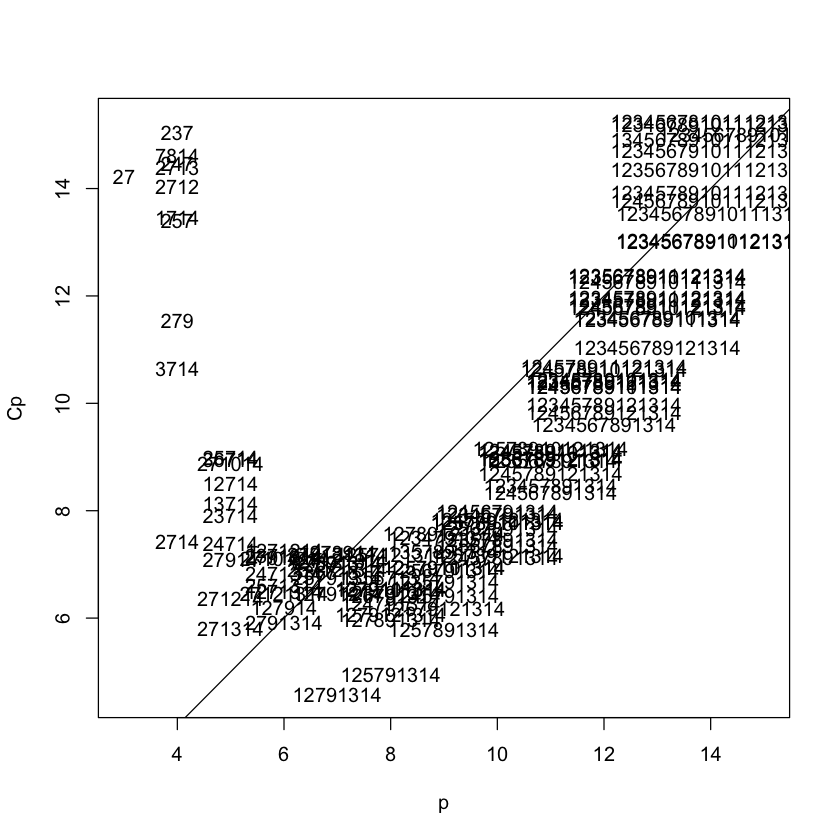

In [30]:
# Mallow’s Cp
X <- model.matrix(model_2)[,-1]
Y <- bodyfat_2[,1]

library(leaps)
library(faraway)

g <- leaps(X,Y)
Cpplot(g)

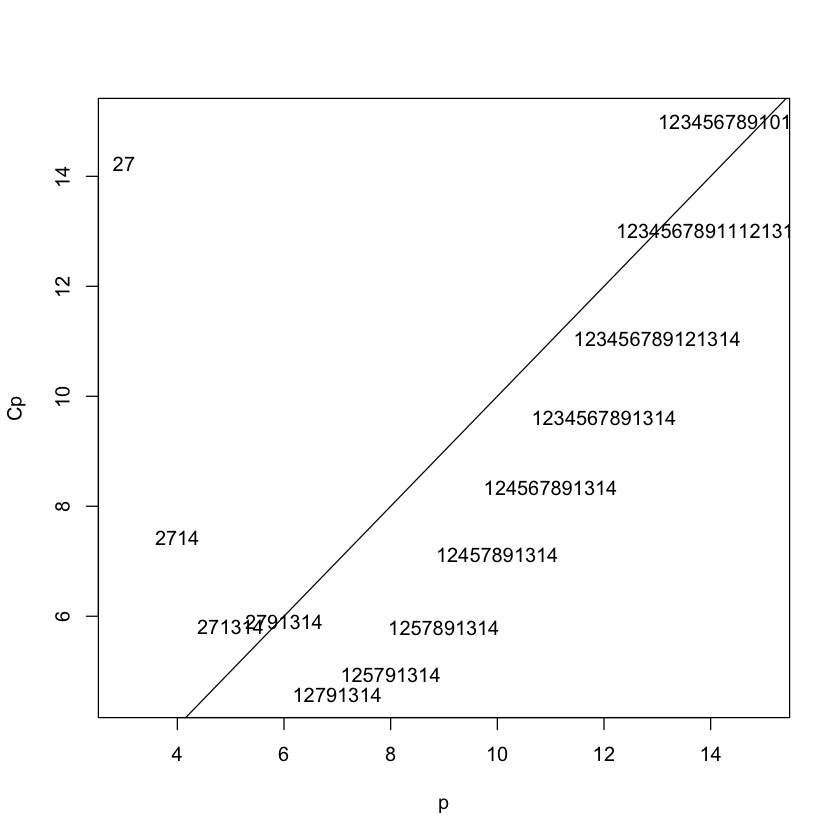

In [31]:
g <- leaps(X,Y, nbest=1)
Cpplot(g)

In [32]:
# (1,3,7,13,14) seems to be a good choice.
cp.choice <- c(1,3,7,13,14)+1 # column 1 responds to bodyfat.
bodyfat_cp <- bodyfat_2[,c(1,cp.choice)]
head(bodyfat_cp)

BODYFAT,AGE,HEIGHT,ABDOMEN,FOREARM,WRIST
<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
12.6,23,67.75,85.2,27.4,17.1
6.9,22,72.25,83.0,28.9,18.2
24.6,22,66.25,87.9,25.2,16.6
10.9,26,72.25,86.4,29.4,18.2
27.8,24,71.25,100.0,27.7,17.7
20.6,24,74.75,94.4,30.6,18.8


In [33]:
summary(model_cp <- lm(BODYFAT ~ ., data=bodyfat_cp))


Call:
lm(formula = BODYFAT ~ ., data = bodyfat_cp)

Residuals:
   Min     1Q Median     3Q    Max 
-9.720 -2.835 -0.186  2.897  8.724 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.03179    7.63072   0.528  0.59774    
AGE          0.05467    0.02307   2.370  0.01859 *  
HEIGHT      -0.30626    0.11345  -2.700  0.00744 ** 
ABDOMEN      0.68714    0.03349  20.521  < 2e-16 ***
FOREARM      0.19684    0.16790   1.172  0.24222    
WRIST       -1.92901    0.41128  -4.690 4.59e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.906 on 239 degrees of freedom
Multiple R-squared:  0.7254,	Adjusted R-squared:  0.7196 
F-statistic: 126.3 on 5 and 239 DF,  p-value: < 2.2e-16


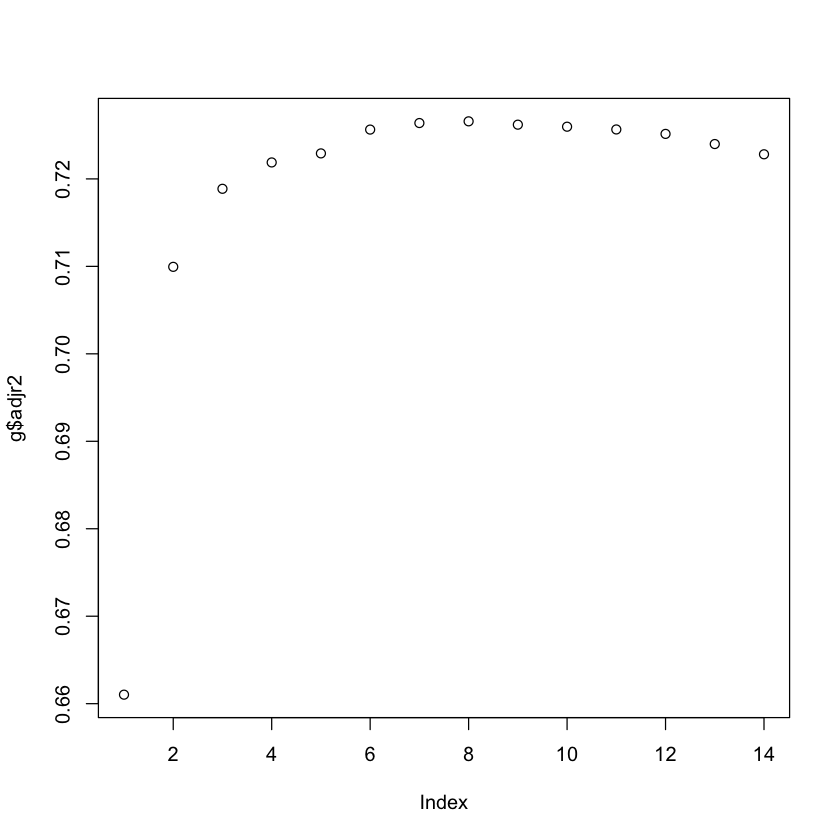

In [34]:
# Adjusted R^2
g <- leaps(X,Y, nbest=1, method="adjr2")
plot(g$adjr2)

In [35]:
(g$which)[which(g$adjr2 == max(g$adjr2)),]

1     2     3     4     5     6     7     8     9     A     B     C     D 
 TRUE  TRUE FALSE FALSE  TRUE FALSE  TRUE  TRUE  TRUE FALSE FALSE FALSE  TRUE 
    E 
 TRUE

In [36]:
r2.choice <- which((g$which)[which(g$adjr2 == max(g$adjr2)),]==T)+1 # column 1 responds to bodyfat.
bodyfat_r2 <- bodyfat_2[,c(1,r2.choice)]
head(bodyfat_r2)

BODYFAT,AGE,WEIGHT,NECK,ABDOMEN,HIP,THIGH,FOREARM,WRIST
<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
12.6,23,154.25,36.2,85.2,94.5,59.0,27.4,17.1
6.9,22,173.25,38.5,83.0,98.7,58.7,28.9,18.2
24.6,22,154.00,34.0,87.9,99.2,59.6,25.2,16.6
10.9,26,184.75,37.4,86.4,101.2,60.1,29.4,18.2
27.8,24,184.25,34.4,100.0,101.9,63.2,27.7,17.7
20.6,24,210.25,39.0,94.4,107.8,66.0,30.6,18.8


In [37]:
summary(model_r2 <- lm(BODYFAT ~ ., data=bodyfat_r2))


Call:
lm(formula = BODYFAT ~ ., data = bodyfat_r2)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.8842 -2.7262 -0.3019  2.6713  9.4349 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -23.31819   10.81298  -2.157  0.03206 *  
AGE           0.05367    0.02852   1.882  0.06107 .  
WEIGHT       -0.08683    0.03747  -2.317  0.02134 *  
NECK         -0.30910    0.20750  -1.490  0.13767    
ABDOMEN       0.85266    0.06821  12.500  < 2e-16 ***
HIP          -0.14074    0.13019  -1.081  0.28077    
THIGH         0.27423    0.11921   2.300  0.02230 *  
FOREARM       0.36999    0.17828   2.075  0.03904 *  
WRIST        -1.34809    0.46894  -2.875  0.00441 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.857 on 236 degrees of freedom
Multiple R-squared:  0.7355,	Adjusted R-squared:  0.7266 
F-statistic: 82.05 on 8 and 236 DF,  p-value: < 2.2e-16


In [38]:
# AIC and BIC
library(MASS)
model_AIC_back <- stepAIC(model_2, direction="backward", k = 2)
summary(model_AIC_back)

Start:  AIC=679.3
BODYFAT ~ AGE + WEIGHT + HEIGHT + ADIPOSITY + NECK + CHEST + 
    ABDOMEN + HIP + THIGH + KNEE + ANKLE + BICEPS + FOREARM + 
    WRIST

            Df Sum of Sq    RSS    AIC
- KNEE       1      0.35 3468.7 677.32
- ANKLE      1      0.53 3468.9 677.33
- BICEPS     1      8.19 3476.6 677.87
- HEIGHT     1     11.69 3480.1 678.12
- CHEST      1     13.87 3482.3 678.27
- ADIPOSITY  1     20.42 3488.8 678.73
- HIP        1     25.92 3494.3 679.12
<none>                   3468.4 679.30
- WEIGHT     1     28.86 3497.2 679.33
- NECK       1     33.18 3501.6 679.63
- THIGH      1     33.96 3502.3 679.68
- FOREARM    1     34.29 3502.7 679.71
- AGE        1     46.64 3515.0 680.57
- WRIST      1    114.70 3583.1 685.27
- ABDOMEN    1   1444.23 4912.6 762.58

Step:  AIC=677.32
BODYFAT ~ AGE + WEIGHT + HEIGHT + ADIPOSITY + NECK + CHEST + 
    ABDOMEN + HIP + THIGH + ANKLE + BICEPS + FOREARM + WRIST

            Df Sum of Sq    RSS    AIC
- ANKLE      1      0.37 3469.1 675.35
-


Call:
lm(formula = BODYFAT ~ AGE + WEIGHT + ABDOMEN + THIGH + FOREARM + 
    WRIST, data = bodyfat_2)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.7749 -2.6863 -0.2464  2.7124  8.5476 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -33.84753    8.01806  -4.221 3.46e-05 ***
AGE           0.05204    0.02834   1.836 0.067543 .  
WEIGHT       -0.11605    0.03195  -3.632 0.000344 ***
ABDOMEN       0.82877    0.06570  12.614  < 2e-16 ***
THIGH         0.21471    0.10776   1.993 0.047455 *  
FOREARM       0.33205    0.17368   1.912 0.057094 .  
WRIST        -1.51955    0.45376  -3.349 0.000944 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.863 on 238 degrees of freedom
Multiple R-squared:  0.7324,	Adjusted R-squared:  0.7256 
F-statistic: 108.6 on 6 and 238 DF,  p-value: < 2.2e-16


In [39]:
model_BIC_back <- stepAIC(model_2, direction="backward", k = log(nrow(bodyfat_2)))
summary(model_BIC_back)

Start:  AIC=731.81
BODYFAT ~ AGE + WEIGHT + HEIGHT + ADIPOSITY + NECK + CHEST + 
    ABDOMEN + HIP + THIGH + KNEE + ANKLE + BICEPS + FOREARM + 
    WRIST

            Df Sum of Sq    RSS    AIC
- KNEE       1      0.35 3468.7 726.34
- ANKLE      1      0.53 3468.9 726.35
- BICEPS     1      8.19 3476.6 726.89
- HEIGHT     1     11.69 3480.1 727.14
- CHEST      1     13.87 3482.3 727.29
- ADIPOSITY  1     20.42 3488.8 727.75
- HIP        1     25.92 3494.3 728.14
- WEIGHT     1     28.86 3497.2 728.34
- NECK       1     33.18 3501.6 728.65
- THIGH      1     33.96 3502.3 728.70
- FOREARM    1     34.29 3502.7 728.72
- AGE        1     46.64 3515.0 729.59
<none>                   3468.4 731.81
- WRIST      1    114.70 3583.1 734.28
- ABDOMEN    1   1444.23 4912.6 811.60

Step:  AIC=726.34
BODYFAT ~ AGE + WEIGHT + HEIGHT + ADIPOSITY + NECK + CHEST + 
    ABDOMEN + HIP + THIGH + ANKLE + BICEPS + FOREARM + WRIST

            Df Sum of Sq    RSS    AIC
- ANKLE      1      0.37 3469.1 720.86



Call:
lm(formula = BODYFAT ~ WEIGHT + ABDOMEN + WRIST, data = bodyfat_2)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.1425 -2.8731 -0.2526  2.8584  9.2058 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -24.65684    6.19366  -3.981 9.09e-05 ***
WEIGHT       -0.09248    0.02240  -4.130 5.01e-05 ***
ABDOMEN       0.88309    0.05159  17.116  < 2e-16 ***
WRIST        -1.18029    0.40059  -2.946  0.00353 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.911 on 241 degrees of freedom
Multiple R-squared:  0.7223,	Adjusted R-squared:  0.7189 
F-statistic:   209 on 3 and 241 DF,  p-value: < 2.2e-16


In [40]:
model_AIC_for <- stepAIC(model_2, direction="forward", k = 2)
summary(model_AIC_for)

Start:  AIC=679.3
BODYFAT ~ AGE + WEIGHT + HEIGHT + ADIPOSITY + NECK + CHEST + 
    ABDOMEN + HIP + THIGH + KNEE + ANKLE + BICEPS + FOREARM + 
    WRIST




Call:
lm(formula = BODYFAT ~ AGE + WEIGHT + HEIGHT + ADIPOSITY + NECK + 
    CHEST + ABDOMEN + HIP + THIGH + KNEE + ANKLE + BICEPS + FOREARM + 
    WRIST, data = bodyfat_2)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.6145 -2.7682 -0.1341  2.6990  8.9761 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -52.98425   45.50500  -1.164  0.24548    
AGE           0.05300    0.03014   1.759  0.07997 .  
WEIGHT       -0.17623    0.12738  -1.383  0.16787    
HEIGHT        0.54474    0.61859   0.881  0.37945    
ADIPOSITY     1.01247    0.87017   1.164  0.24582    
NECK         -0.31973    0.21555  -1.483  0.13935    
CHEST        -0.09945    0.10371  -0.959  0.33859    
ABDOMEN       0.83770    0.08560   9.786  < 2e-16 ***
HIP          -0.17800    0.13577  -1.311  0.19117    
THIGH         0.20692    0.13789   1.501  0.13483    
KNEE          0.03515    0.22914   0.153  0.87821    
ANKLE        -0.04642    0.24864  -0.187  0.85205    
BICEPS        0

In [41]:
model_BIC_for <- stepAIC(model_2, direction="forward", k = log(nrow(bodyfat_2)))
summary(model_BIC_for)

Start:  AIC=731.81
BODYFAT ~ AGE + WEIGHT + HEIGHT + ADIPOSITY + NECK + CHEST + 
    ABDOMEN + HIP + THIGH + KNEE + ANKLE + BICEPS + FOREARM + 
    WRIST




Call:
lm(formula = BODYFAT ~ AGE + WEIGHT + HEIGHT + ADIPOSITY + NECK + 
    CHEST + ABDOMEN + HIP + THIGH + KNEE + ANKLE + BICEPS + FOREARM + 
    WRIST, data = bodyfat_2)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.6145 -2.7682 -0.1341  2.6990  8.9761 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -52.98425   45.50500  -1.164  0.24548    
AGE           0.05300    0.03014   1.759  0.07997 .  
WEIGHT       -0.17623    0.12738  -1.383  0.16787    
HEIGHT        0.54474    0.61859   0.881  0.37945    
ADIPOSITY     1.01247    0.87017   1.164  0.24582    
NECK         -0.31973    0.21555  -1.483  0.13935    
CHEST        -0.09945    0.10371  -0.959  0.33859    
ABDOMEN       0.83770    0.08560   9.786  < 2e-16 ***
HIP          -0.17800    0.13577  -1.311  0.19117    
THIGH         0.20692    0.13789   1.501  0.13483    
KNEE          0.03515    0.22914   0.153  0.87821    
ANKLE        -0.04642    0.24864  -0.187  0.85205    
BICEPS        0

In [42]:
model_AIC_step <- stepAIC(model_2, direction="both", k = 2)
summary(model_AIC_step)

Start:  AIC=679.3
BODYFAT ~ AGE + WEIGHT + HEIGHT + ADIPOSITY + NECK + CHEST + 
    ABDOMEN + HIP + THIGH + KNEE + ANKLE + BICEPS + FOREARM + 
    WRIST

            Df Sum of Sq    RSS    AIC
- KNEE       1      0.35 3468.7 677.32
- ANKLE      1      0.53 3468.9 677.33
- BICEPS     1      8.19 3476.6 677.87
- HEIGHT     1     11.69 3480.1 678.12
- CHEST      1     13.87 3482.3 678.27
- ADIPOSITY  1     20.42 3488.8 678.73
- HIP        1     25.92 3494.3 679.12
<none>                   3468.4 679.30
- WEIGHT     1     28.86 3497.2 679.33
- NECK       1     33.18 3501.6 679.63
- THIGH      1     33.96 3502.3 679.68
- FOREARM    1     34.29 3502.7 679.71
- AGE        1     46.64 3515.0 680.57
- WRIST      1    114.70 3583.1 685.27
- ABDOMEN    1   1444.23 4912.6 762.58

Step:  AIC=677.32
BODYFAT ~ AGE + WEIGHT + HEIGHT + ADIPOSITY + NECK + CHEST + 
    ABDOMEN + HIP + THIGH + ANKLE + BICEPS + FOREARM + WRIST

            Df Sum of Sq    RSS    AIC
- ANKLE      1      0.37 3469.1 675.35
-


Call:
lm(formula = BODYFAT ~ AGE + WEIGHT + ABDOMEN + THIGH + FOREARM + 
    WRIST, data = bodyfat_2)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.7749 -2.6863 -0.2464  2.7124  8.5476 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -33.84753    8.01806  -4.221 3.46e-05 ***
AGE           0.05204    0.02834   1.836 0.067543 .  
WEIGHT       -0.11605    0.03195  -3.632 0.000344 ***
ABDOMEN       0.82877    0.06570  12.614  < 2e-16 ***
THIGH         0.21471    0.10776   1.993 0.047455 *  
FOREARM       0.33205    0.17368   1.912 0.057094 .  
WRIST        -1.51955    0.45376  -3.349 0.000944 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.863 on 238 degrees of freedom
Multiple R-squared:  0.7324,	Adjusted R-squared:  0.7256 
F-statistic: 108.6 on 6 and 238 DF,  p-value: < 2.2e-16


In [43]:
model_BIC_step <- stepAIC(model_2, direction="both", k = log(nrow(bodyfat_2)))
summary(model_BIC_step)

Start:  AIC=731.81
BODYFAT ~ AGE + WEIGHT + HEIGHT + ADIPOSITY + NECK + CHEST + 
    ABDOMEN + HIP + THIGH + KNEE + ANKLE + BICEPS + FOREARM + 
    WRIST

            Df Sum of Sq    RSS    AIC
- KNEE       1      0.35 3468.7 726.34
- ANKLE      1      0.53 3468.9 726.35
- BICEPS     1      8.19 3476.6 726.89
- HEIGHT     1     11.69 3480.1 727.14
- CHEST      1     13.87 3482.3 727.29
- ADIPOSITY  1     20.42 3488.8 727.75
- HIP        1     25.92 3494.3 728.14
- WEIGHT     1     28.86 3497.2 728.34
- NECK       1     33.18 3501.6 728.65
- THIGH      1     33.96 3502.3 728.70
- FOREARM    1     34.29 3502.7 728.72
- AGE        1     46.64 3515.0 729.59
<none>                   3468.4 731.81
- WRIST      1    114.70 3583.1 734.28
- ABDOMEN    1   1444.23 4912.6 811.60

Step:  AIC=726.34
BODYFAT ~ AGE + WEIGHT + HEIGHT + ADIPOSITY + NECK + CHEST + 
    ABDOMEN + HIP + THIGH + ANKLE + BICEPS + FOREARM + WRIST

            Df Sum of Sq    RSS    AIC
- ANKLE      1      0.37 3469.1 720.86



Call:
lm(formula = BODYFAT ~ WEIGHT + ABDOMEN + WRIST, data = bodyfat_2)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.1425 -2.8731 -0.2526  2.8584  9.2058 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -24.65684    6.19366  -3.981 9.09e-05 ***
WEIGHT       -0.09248    0.02240  -4.130 5.01e-05 ***
ABDOMEN       0.88309    0.05159  17.116  < 2e-16 ***
WRIST        -1.18029    0.40059  -2.946  0.00353 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.911 on 241 degrees of freedom
Multiple R-squared:  0.7223,	Adjusted R-squared:  0.7189 
F-statistic:   209 on 3 and 241 DF,  p-value: < 2.2e-16
